## Importing Libraries

In [9]:
import _pickle as pickle
import pandas as pd
import numpy as np
np.random.seed(0)
from gensim.models import Word2Vec
from nltk import word_tokenize

## Importing Data

In [2]:
# Loading in the first DF
with open("city1_df.pkl",'rb') as fp:
    city_1 = pickle.load(fp)

# Loading in the second DF
with open("city2_df.pkl",'rb') as fp:
    city_2 = pickle.load(fp)

## Function to Balance Data

In [3]:
def city_balance(city_1, city_2):
    """
    Balances the number of unique tweets from each city
    Removes brief tweets
    """
    # Removing tweets with less than 10 characters
    city_1 = city_1[city_1.tweet.map(len)>10]
    city_2 = city_2[city_2.tweet.map(len)>10]
    
    # Removing tweets from the same user
    city_1 = city_1.drop_duplicates('user_id')
    city_2 = city_2.drop_duplicates('user_id')

    # Checking for class balance
    dif = abs(len(city_1) - len(city_2))

    # Randomly dropping rows from the DF with a greater number of rows
    if len(city_1) > len(city_2):
        city_1 = city_1.drop(random.sample(list(city_1.index), dif))
    elif len(city_2) > len(city_1):
        city_2 = city_2.drop(random.sample(list(city_2.index), dif))
    else:
        print("DFs are balanced")
    
    print(f"DF Lengths:\nCity 1 = {len(city_1)}\nCity 2 = {len(city_2)}")

    return city_1, city_2

In [4]:
city_1, city_2 = city_balance(city_1, city_2)

DF Lengths:
City 1 = 934
City 2 = 934


In [5]:
main_df = city_1.append(city_2)
main_df

,cashtags,conversation_id,created_at,date,day,geo,hashtags,hour,id,link,...,search,source,timezone,tweet,user_id,user_id_str,user_rt,user_rt_id,username,City
2,[],1179411261337067520,1570028697000,2019-10-02 11:04:57,3,,[],06,1179411954416439296,https://twitter.com/mfow020/status/11794119544...,...,Trump,,EDT,Enemy of the people!!!,987789810570969088,987789810570969088,,,mfow020,Seattle
7,[],1179411764573872129,1570028651000,2019-10-02 11:04:11,2,,[],17,1179411764573872129,https://twitter.com/ColinDavies1967/status/117...,...,Trump,,EDT,When Trump and his allies finally hit rock bot...,824303270407512064,824303270407512064,,,ColinDavies1967,Seattle
8,[],1179411764074762240,1570028651000,2019-10-02 11:04:11,2,,[#dontheconjr],17,1179411764074762240,https://twitter.com/TheMindOfColi/status/11794...,...,Trump,,EDT,"seriously, i “thought” he was supposed to be t...",975209966,975209966,,,TheMindOfColi,Seattle
12,[],1179193225325826050,1570028639000,2019-10-02 11:03:59,2,,[],14,1179411714913243137,https://twitter.com/Oldschol69/status/11794117...,...,Trump,,EDT,Trump continues to violate the guidelines of n...,256108334,256108334,,,Oldschol69,Seattle
14,[],1179399771695521794,1570028608000,2019-10-02 11:03:28,2,,[#maga2020],05,1179411582884954123,https://twitter.com/PattersonDedric/status/117...,...,Trump,,EDT,"Joe, the name of the Ukraine gas company is Bu...",815438580105392128,815438580105392128,,,PattersonDedric,Seattle
15,[],1179411261337067520,1570028600000,2019-10-02 11:03:20,2,,[],03,1179411547904516097,https://twitter.com/twittdwitt/status/11794115...,...,Trump,,EDT,Too late. Moot’s out there.,37804799,37804799,,,twittdwitt,Seattle
16,[],1179411530590371841,1570028595000,2019-10-02 11:03:15,2,,[],02,1179411530590371841,https://twitter.com/CindiLewis9/status/1179411...,...,Trump,,EDT,So how will trump harangue Bernie about his he...,292719867,292719867,,,CindiLewis9,Seattle
17,[],1179409420322779136,1570028594000,2019-10-02 11:03:14,2,,[],01,1179411522810007553,https://twitter.com/AccountingDrone/status/117...,...,Trump,,EDT,They really think that impeachment just ends w...,1099787876705824768,1099787876705824768,,,AccountingDrone,Seattle
19,[],1178986524630802432,1570028588000,2019-10-02 11:03:08,2,,[],00,1179411501062467589,https://twitter.com/WillSeattle/status/1179411...,...,Trump,,EDT,More communism from Trump,16645396,16645396,,,WillSeattle,Seattle
20,[],1179411472696430593,1570028582000,2019-10-02 11:03:02,1,,[],22,1179411472696430593,https://twitter.com/LeRoyMyLove/status/1179411...,...,Trump,,EDT,Pelosi phony stop talking about using prayers ...,2335482488,2335482488,,,LeRoyMyLove,Seattle


## Tokenizing

In [6]:
target = main_df.City
data = main_df.tweet.map(word_tokenize).values
tot_vocab = set(word for twt in data for word in twt)


In [7]:
glove = {}
with open('glove.twitter.27B.200d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in tot_vocab:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [13]:
seattle = city_1.tweet.map(word_tokenize).values
jacksonville = city_2.tweet.map(word_tokenize).values

## Word2Vec Models

In [15]:
seamodel = Word2Vec(seattle, size=100, window=5, min_count=1, workers=4)
jaxmodel = Word2Vec(jacksonville, size=100, window=5, min_count=1, workers=4)

In [18]:
seamodel.train(seattle, total_examples=model.corpus_count, epochs=10)

(164462, 217910)

In [19]:
jaxmodel.train(jacksonville, total_examples=model.corpus_count, epochs=10)

(173148, 227350)

In [20]:
sea = seamodel.wv
jax = jaxmodel.wv

In [22]:
sea.most_similar('Trump')

[('confirms', 0.9888250231742859),
 ('Yanking', 0.9879821538925171),
 ('opponent', 0.9870368838310242),
 ('talked', 0.9865272045135498),
 ('lie', 0.9862707257270813),
 ('earned', 0.9857978820800781),
 ('Low', 0.9843940734863281),
 ('friend', 0.9840611815452576),
 ('Ukraine', 0.9839744567871094),
 ('Pompeo', 0.9838776588439941)]

In [23]:
jax.most_similar('Trump')

[('professional', 0.988140344619751),
 ('effort', 0.9848328828811646),
 ('slow', 0.9841837882995605),
 ('bigger', 0.9839301109313965),
 ('corruption', 0.983591616153717),
 ('next', 0.9825000166893005),
 ('hit', 0.9823483228683472),
 ('administration', 0.9819989204406738),
 ('matter', 0.9819124937057495),
 ('garbage', 0.9814494848251343)]

In [26]:
sea.most_similar('impeachment')

[('corrupt', 0.9980810880661011),
 ('inquiry', 0.9978455305099487),
 ('campaign', 0.9978305101394653),
 ('company', 0.9975610971450806),
 ('failed', 0.9974898099899292),
 ('reportedly', 0.9972450733184814),
 ('LEAST', 0.9972416162490845),
 ('Washington', 0.9972003698348999),
 ('Bill', 0.9970033168792725),
 ('leading', 0.996975302696228)]

In [27]:
jax.most_similar('impeachment')

[('true', 0.9987257122993469),
 ('level', 0.9985029101371765),
 ('point', 0.9983292818069458),
 ('truth', 0.9983223676681519),
 ('day', 0.9982977509498596),
 ('man', 0.9982079863548279),
 ('war', 0.9980502128601074),
 ('transition', 0.9979956746101379),
 ('sides', 0.9979048371315002),
 ('2', 0.9978101849555969)]

In [28]:
sea.most_similar('fake')

[('conspiracy', 0.9993367791175842),
 ('Another', 0.9992767572402954),
 ('little', 0.9992058277130127),
 ('these', 0.9992004632949829),
 ('fan', 0.9990925788879395),
 ('per', 0.9990098476409912),
 ('gain', 0.9989922642707825),
 ('found', 0.9989359974861145),
 ('media', 0.9989181160926819),
 ('man', 0.9989063143730164)]

In [31]:
jax.most_similar('fake')

[('U.S.', 0.9995137453079224),
 ('after', 0.9993374347686768),
 ('Still', 0.999267041683197),
 ('wall', 0.9992471933364868),
 ('State', 0.9992318153381348),
 ('Pence', 0.9992027282714844),
 ('word', 0.9991943836212158),
 ('build', 0.9991872906684875),
 ('campaign', 0.9991626739501953),
 ('govt', 0.9991525411605835)]

In [39]:
sea.most_similar('corruption')

[('Lol', 0.9990520477294922),
 ('another', 0.9984223246574402),
 ('gets', 0.9984176158905029),
 ('stopped', 0.9983800053596497),
 ('crime', 0.9983342289924622),
 ('enough', 0.998252272605896),
 ('truly', 0.9981764554977417),
 ('write', 0.9981399178504944),
 ('Said', 0.9979938268661499),
 ('Have', 0.9977768063545227)]

In [40]:
jax.most_similar('corruption')

[('break', 0.9982860684394836),
 ('next', 0.9982307553291321),
 ('Americans', 0.9979774355888367),
 ('guilty', 0.9979057312011719),
 ('phone', 0.9977189302444458),
 ('hit', 0.99761962890625),
 ('Administration', 0.9975788593292236),
 ('whole', 0.9973346590995789),
 ('Every', 0.9972599148750305),
 ('impeaching', 0.9972466826438904)]

In [36]:
sea.most_similar('news')

[('whole', 0.9996017217636108),
 ('other', 0.9994285106658936),
 ('Dems', 0.9993098974227905),
 ('strong', 0.9992450475692749),
 ('plan', 0.9991360902786255),
 ('very', 0.9990653395652771),
 ('away', 0.9990043640136719),
 ('two', 0.998959481716156),
 ('house', 0.9989407062530518),
 ('Republican', 0.9989100694656372)]

In [32]:
jax.most_similar('news')

[('THIS', 0.9984259009361267),
 ('change', 0.998386561870575),
 ('bring', 0.9983681440353394),
 ('🤔', 0.9979832172393799),
 ('My', 0.9979755878448486),
 ('Reid', 0.9977353811264038),
 ('else', 0.9976097345352173),
 ('states', 0.9975491762161255),
 ('Harry', 0.9973633885383606),
 ('forward', 0.9973139762878418)]

In [87]:
jax.similarity('Trump', 'Ukraine')

0.94713235

In [98]:
sea.similarity('Trump', 'Ukraine')

0.9839746

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

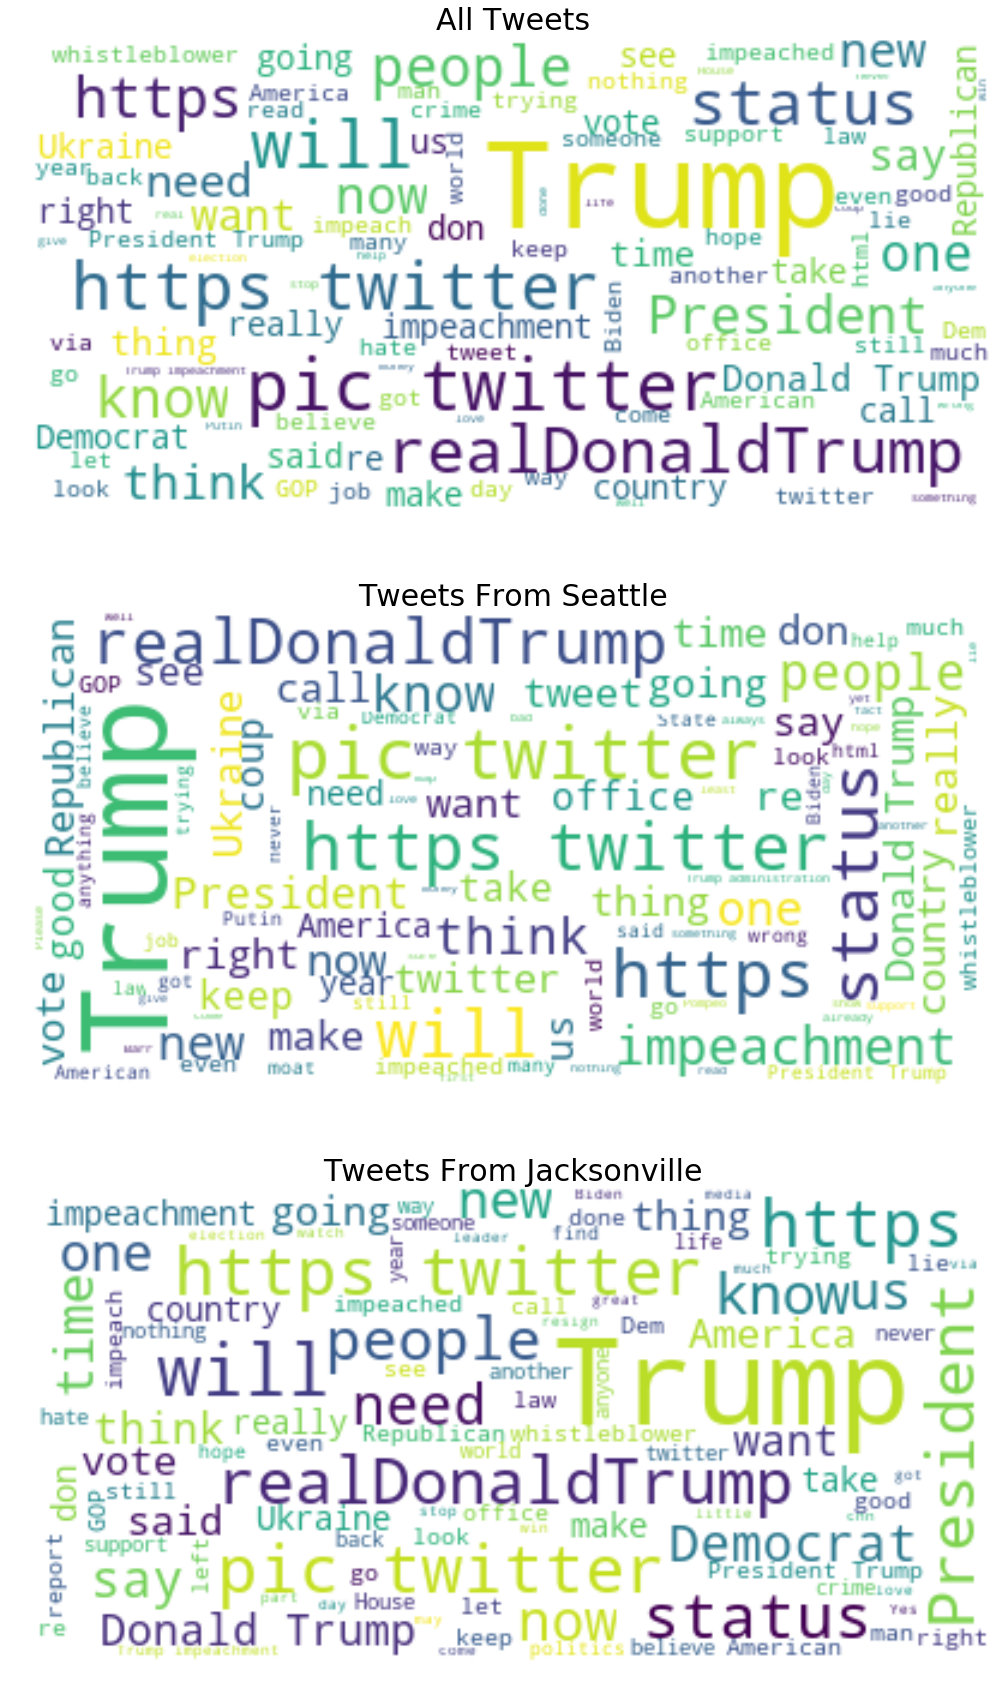

In [109]:
tweet_all = " ".join(review for review in main_df.tweet)
tweet_sea = " ".join(review for review in city_1.tweet)
tweet_jax = " ".join(review for review in city_2.tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_all)
wordcloud_sea = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sea)
wordcloud_jax = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_jax)

# Display the generated image:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_sea, interpolation='bilinear')
ax[1].set_title('Tweets From Seattle',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_jax, interpolation='bilinear')
ax[2].set_title('Tweets From Jacksonville',fontsize=30)
ax[2].axis('off')
